# Fourier Transforms

Practical bits

**Author: Christopher Lee**

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 2a
def cosine_wave(time, amplitude, period, phase):
    """Generate a cosine wave with known amplitude, period, and phase"""
    return amplitude * np.cos((time/period - phase) * 2 * np.pi)

def wave(time, args):
    amp=0
    for l in args:
        amp+=cosine_wave(time, *l)
    return amp
def wave_plot(time, data, title,ax=None):
    if ax is None:
        fig = plt.figure(figsize=(12,8))
        ax = plt.gca()
    ax.plot(time, data)
    ax.set_title(title)
    ax.set_ylabel("Value")
    ax.set_xlabel("Time (days?)")
    ax.grid()
time = np.arange(0,10,1/24)


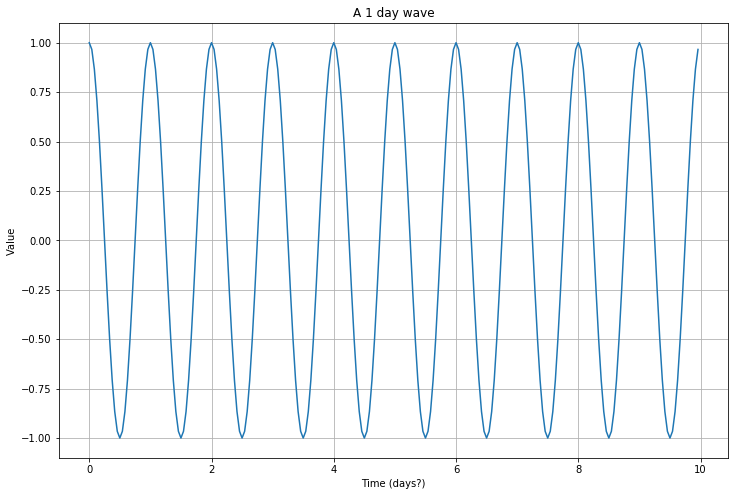

In [6]:
wave_plot(time, wave(time, 
                    [
                        [1,1,0]
                    ]),
         "A 1 day wave")

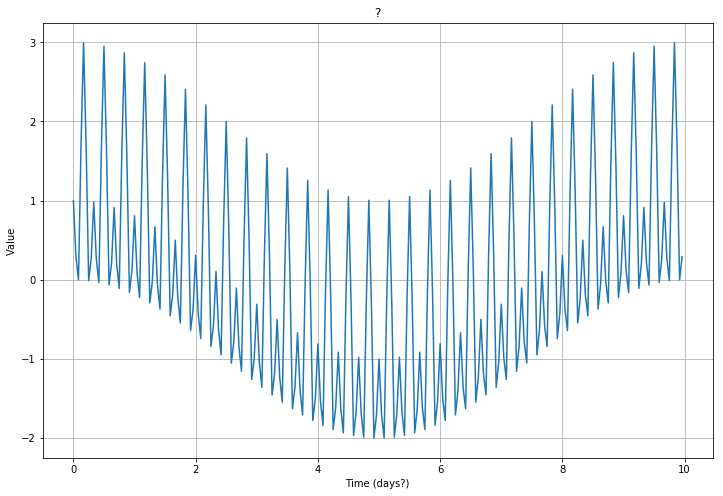

In [49]:
wave_plot(time, wave(time, 
                    [
                        [1,1/6,0],
                        [1,1/3,0.5],
                        [1,10,0],
                    ]),
         "?")

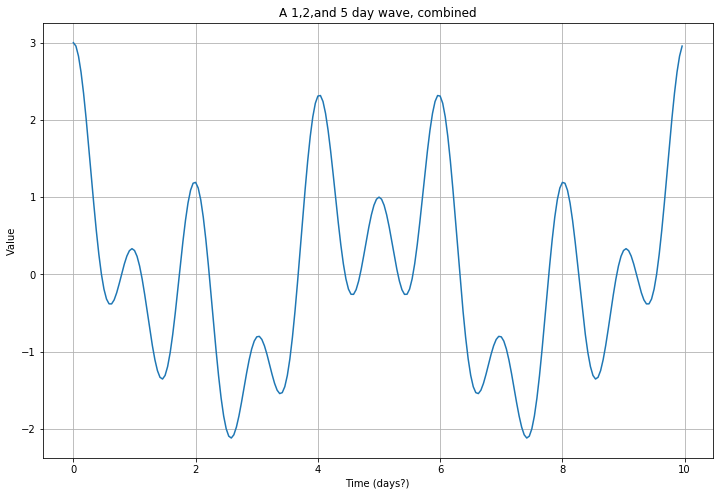

In [5]:
wave_plot(time, wave(time, 
                    [
                        [1,1,0],
                        [1,2,0],
                        [1,5,0],
                    ]),
         "A 1,2,and 5 day wave, combined")

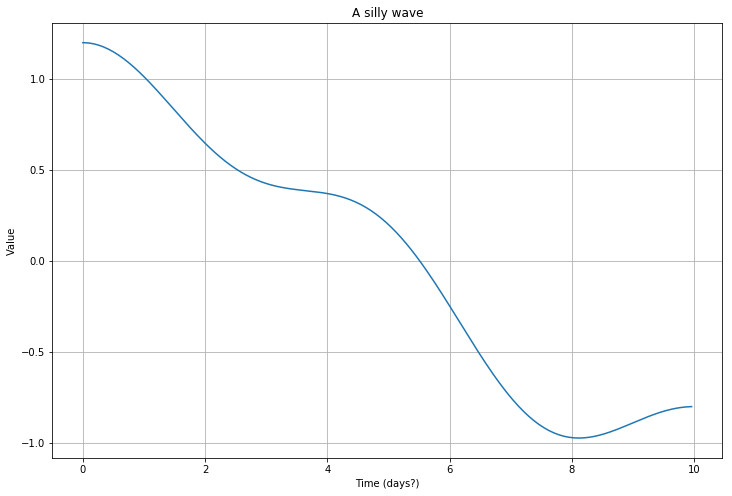

In [6]:
wave_plot(time, wave(time, 
                    [
                        [1,20,0],
                        [1/5,5,0],
                    ]),
         "A silly wave")

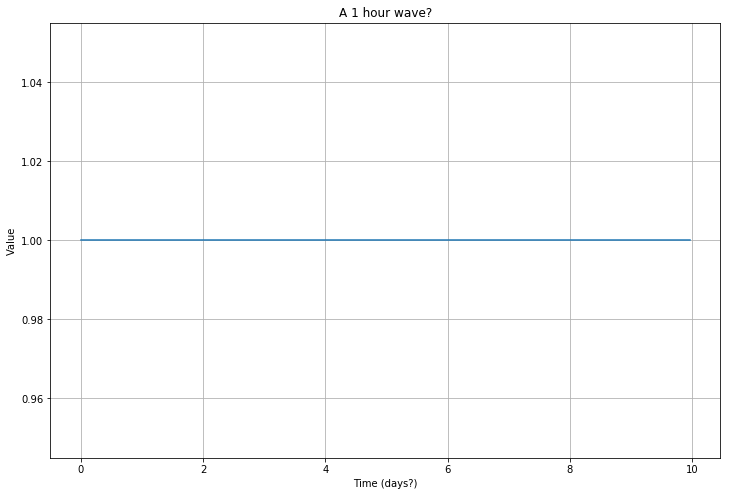

In [7]:
#time = np.arange(0,10,1/24)
wave_plot(time, wave(time, 
                    [
                        [1,1/24,0],
                    ]),
         "A 1 hour wave?")

(0, 1)

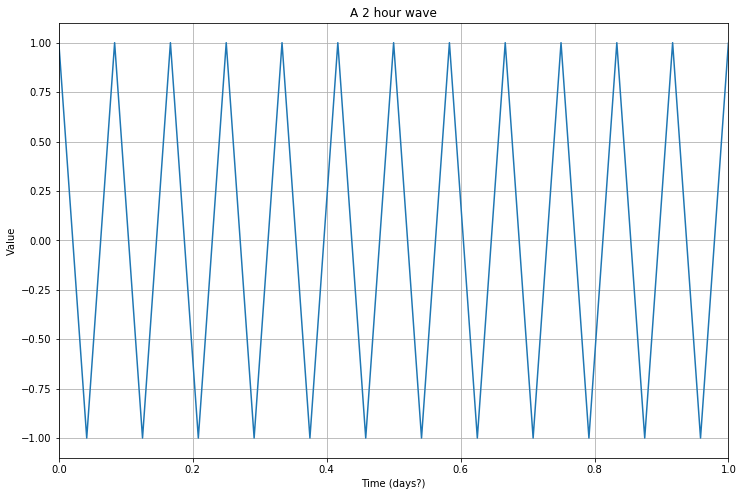

In [12]:
wave_plot(time, wave(time, 
                    [
                        [1,1/12,0],
                    ]),
         "A 2 hour wave")
plt.xlim(0,1)

(0, 1)

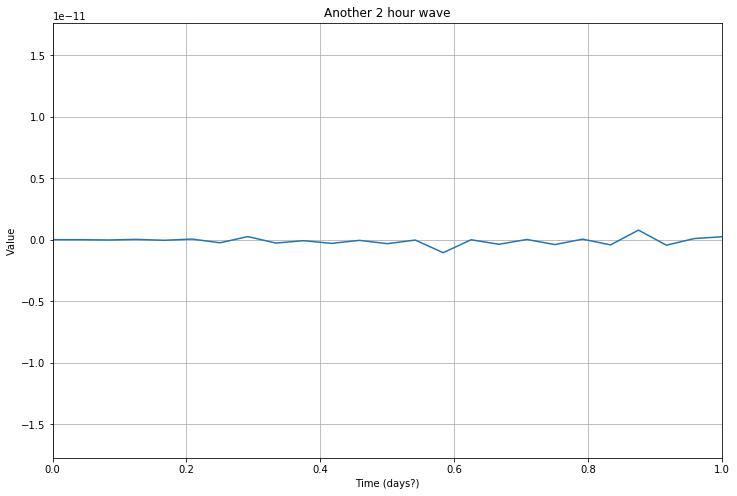

In [232]:
phase = 0.25 # shift the wave by 1 quarter wavelength
wave_plot(time, wave(time, 
                    [
                        [100,1/12,phase],
                    ]),
         "Another 2 hour wave")
plt.xlim(0,1)

# FFT gives us what data, exactly?


240 240


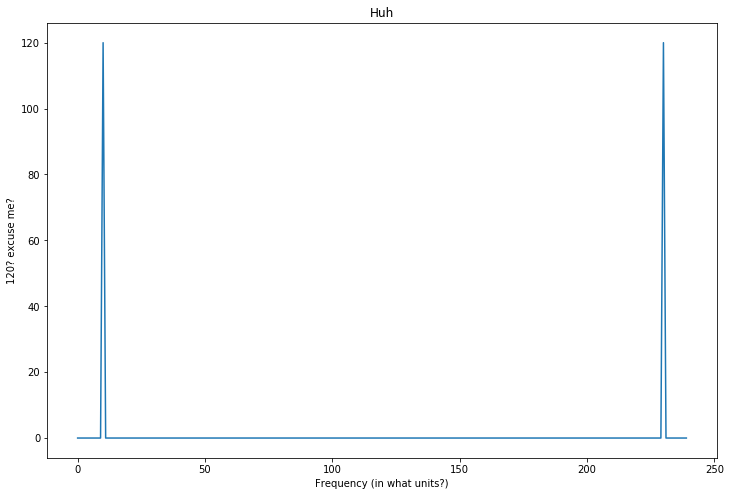

In [17]:
import numpy.fft as fft

# wave period 1, amplitude 1, easy peasy
y = wave(time,  [
                        [1,1,0]
                    ])
#FFT the data
fy = fft.fft(y)
#plot stuff
plt.figure(figsize=(12,8))
_ = plt.plot(fy);
plt.title("Huh")
plt.xlabel("Frequency (in what units?)")
plt.ylabel("120? excuse me?")
print(len(fy), len(y))

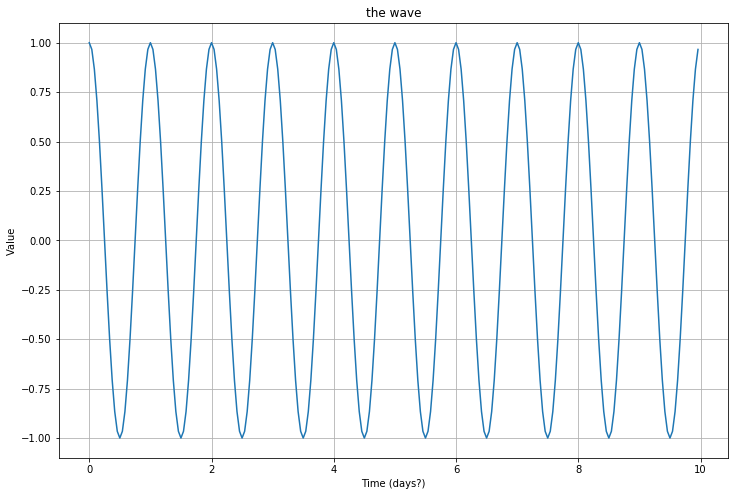

In [76]:
wave_plot(time, y,"the wave")

240 240


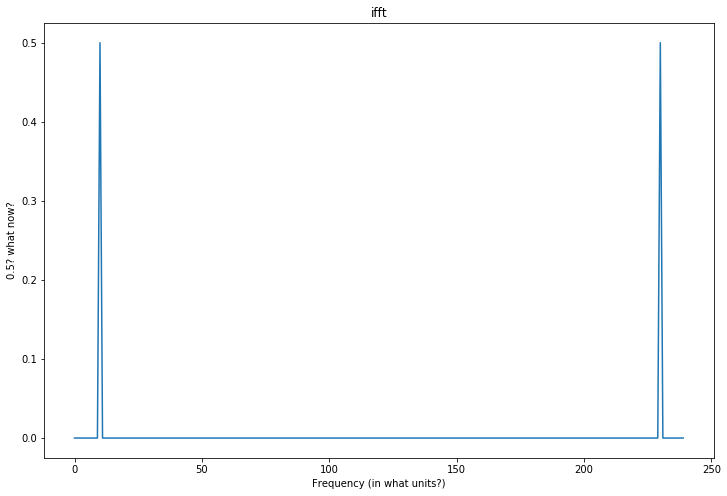

In [19]:
#Inverse FFT
fy = fft.ifft(y)
plt.figure(figsize=(12,8))
_ = plt.plot(fy);
plt.title("ifft")
plt.xlabel("Frequency (in what units?)")
plt.ylabel("0.5? what now?")
print(len(fy), len(y))

121 240


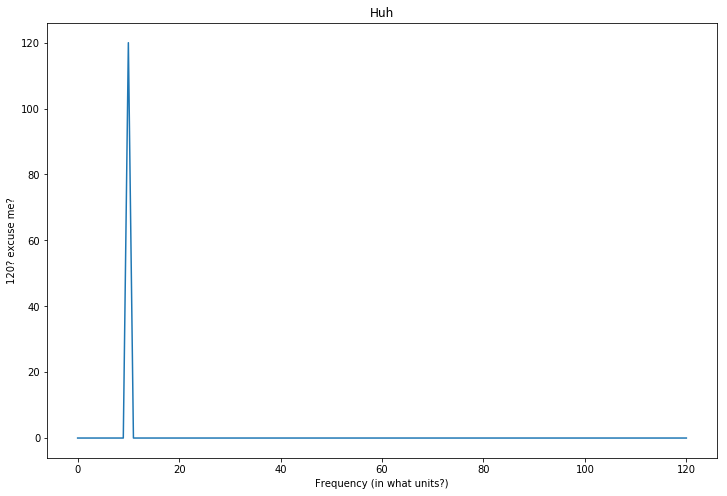

In [20]:
#real fft
fy = fft.rfft(y) #What happened to the second peak?
plt.figure(figsize=(12,8))
_ = plt.plot(fy);
plt.title("Huh")
plt.xlabel("Frequency (in what units?)")
plt.ylabel("120? excuse me?")
print(len(fy), len(y))

478 240


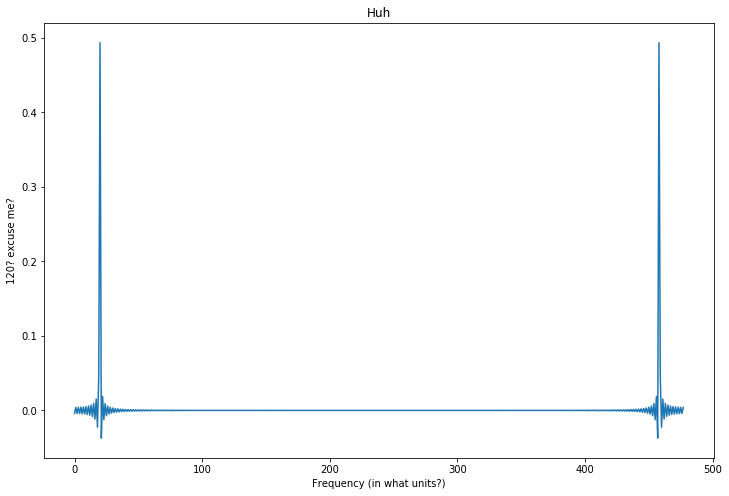

In [24]:
#IRFFT
fy = fft.irfft(y) #extra optional argument available
plt.figure(figsize=(12,8))
_ = plt.plot(fy);
plt.title("Huh")
plt.xlabel("Frequency (in what units?)")
plt.ylabel("120? excuse me?")
print(len(fy), len(y))

FFT returns complex (or real) amplitudes as a function of frequency, but in a slightly odd format.

  * For an array of length N, there will be N points in the FFT and IFFT
  * For an array of length N, there will be N/2(+1) points in the RFFT and 2(N-1) in the IRFFT (you can control these a bit)
  * Each entry is the frequency $\frac{k}{Nd}$ where $k$ is the entry index, and $d$ is the spacing, going from $k=0\dots\frac{N}{2}$, then $k=-\frac{N}{2}\dots -1$. The upper bound of $k$ changes slightly for odd and even numbers of points.
  * The function `fftfreq` knows how to make the frequency values, use it to generate the frequency data if possible
  * For the `fft` function, a scale factor of $N$ appears in the amplitude data (or technically, $\frac{1}{N}$ doesn't appear.
  * In the `ifft` function, the $\frac{1}{N}$ appears.
 

FFTs return complex numbers

  * convert to amplitude with the `np.abs` function
  * calculate the phase with `np.arctan2` as $\phi = \tan^{-1}(\frac{-i}{r})$
  

In [197]:
def proto_fft(data, dt):
    fdata = fft.fft(data) #get the fft
    freqs = fft.fftfreq(len(data),dt) #get the frequencies
    
    amplitude = np.abs(fdata)/len(data)
    phase = np.arctan2(-fdata.imag, fdata.real) #still not sure what this means
    
    return fdata, freqs, amplitude, phase

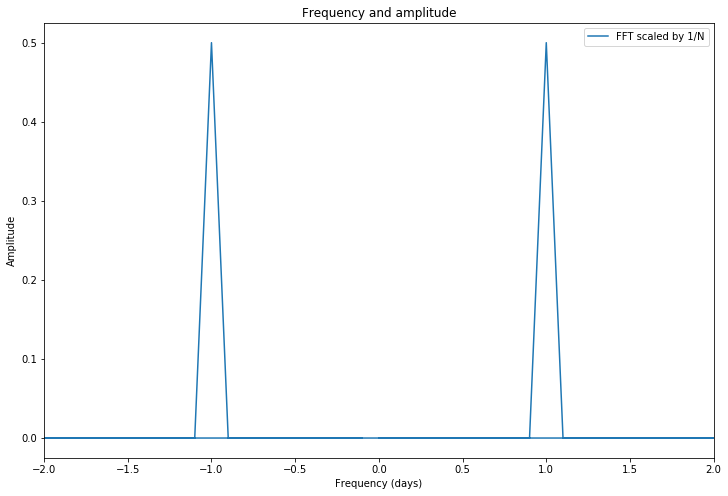

In [47]:
plt.figure(figsize=(12,8))

fdata, freqs, amplitude, phase = proto_fft(y, 1/24)

_ = plt.plot(freqs, amplitude, label="FFT scaled by 1/N"); #coincidentally this doesn't look awful, but the plot is broken

plt.title("Frequency and amplitude")
plt.xlabel("Frequency (days)")
plt.ylabel("Amplitude")
plt.xlim(-2,2)
plt.legend()

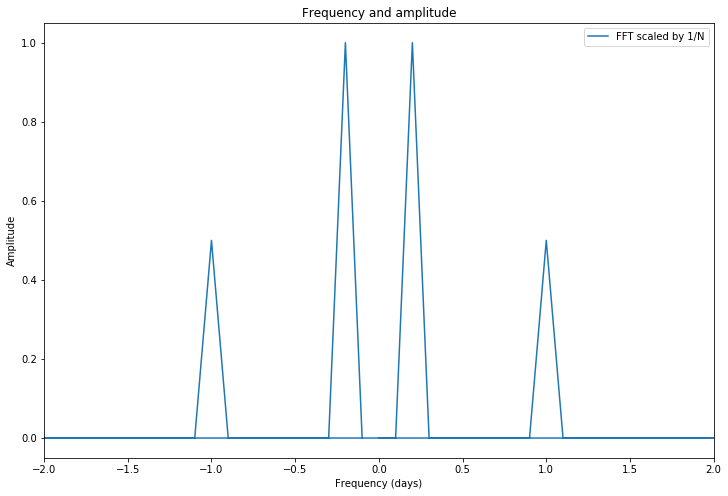

In [96]:
y2 = wave(time,[[1,1,0.25],[2,5,0.25]])# period 1, amplitude 1 . period 5, amplitude 2

plt.figure(figsize=(12,8))

fdata, freqs, amplitude, phase = proto_fft(y2, 1/24)

_ = plt.plot(freqs, amplitude, label="FFT scaled by 1/N"); #coincidentally this doesn't look awful, but the plot is broken

plt.title("Frequency and amplitude")
plt.xlabel("Frequency (days)")
plt.ylabel("Amplitude")
plt.xlim(-2,2)
plt.legend()


## Two peaks?

For time series (like this sine wave), there will be two peaks for every wave mode in the dataset. 
  * The frequencies go from 0..1/2d, then -1/2d..1 (roughly), but a negative frequency is the same as a positive frequency.
  * Simplify the data by taking 1 half of the FFT, and double *all of the wave modes that are duplicated*
  * *NOT the 0 frequency*.
  
 Alternatively, use the `rfft` function that deals with some of this process, and should be faster.


In [98]:
def proto_fft_2(data, dt):
    fdata = fft.fft(data) #get the fft
    freqs = fft.fftfreq(len(data),dt) #get the frequencies
    
    amplitude = np.abs(fdata)/len(data)
    phase = np.arctan2(-fdata.imag, fdata.real) #still not sure how to interpret this...
    
    ln  = len(data)//2 # how do I fix this for odd length arrays?
    
    amplitude = amplitude[:ln]
    phase = phase[:ln]
    freqs = freqs[:ln]
    
    amplitude[1:]*=2 # double it
    return fdata, freqs, amplitude, phase

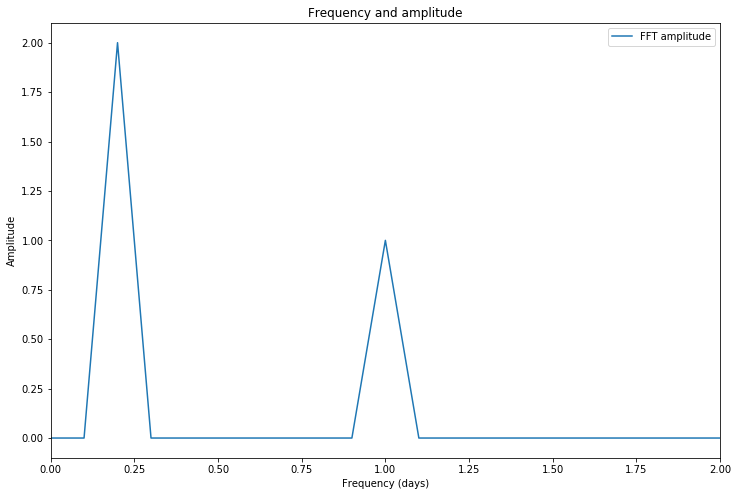

In [99]:
y2 = wave(time,[[1,1,0.25],[2,5,0.25]])# period 1, amplitude 1 . period 5, amplitude 2

plt.figure(figsize=(12,8))

fdata, freqs, amplitude, phase = proto_fft_2(y2, 1/
24)

_ = plt.plot(freqs, amplitude, label="FFT amplitude");

plt.title("Frequency and amplitude")
plt.xlabel("Frequency (days)")
plt.ylabel("Amplitude")
plt.xlim(0,2)
plt.legend()

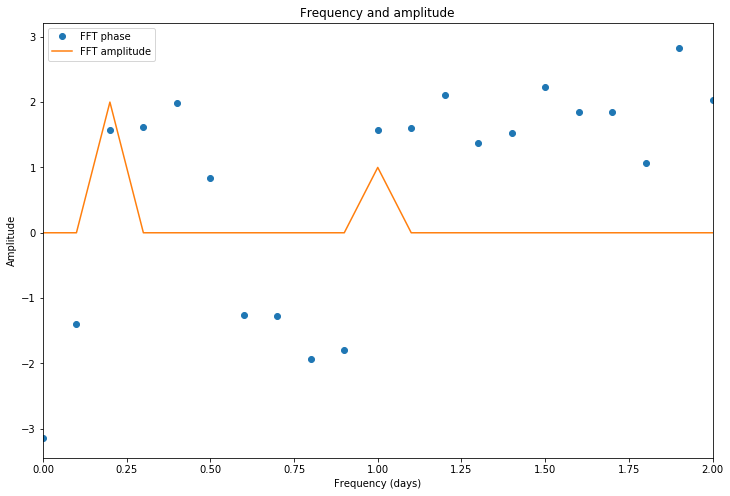

In [198]:
y2 = wave(time,[[1,1,0.25],[2,5,0.25]])# period 1, amplitude 1 . period 5, amplitude 2

plt.figure(figsize=(12,8))

fdata, freqs, amplitude, phase = proto_fft_2(y2, 1/24)

_ = plt.plot(freqs, phase, 'o',label="FFT phase");
_ = plt.plot(freqs, amplitude, label="FFT amplitude");
plt.title("Frequency and amplitude")
plt.xlabel("Frequency (days)")
plt.ylabel("Amplitude")
plt.xlim(0,2)
plt.legend()

$\pi$ when we said "0.25" -> $\frac{1}{4}2\pi = \frac{\pi}{2}$


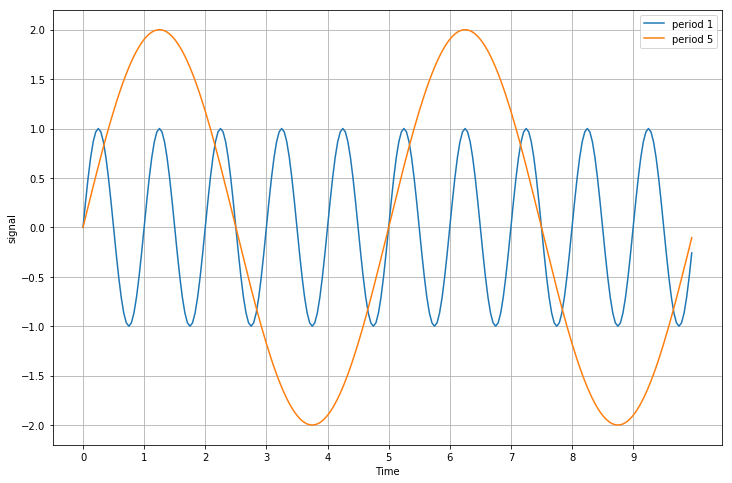

In [199]:
#Let's check our sanity
plt.figure(figsize=(12,8))
plt.plot(time, wave(time,[[1,1,0.25]]),label="period 1")# period 1, amplitude 1, phase 0
plt.plot(time, wave(time,[[2,5,0.25]]),label="period 5")# period 5, amplitude 2, phase 0.5
plt.xlabel("Time")
plt.ylabel("signal")
plt.legend()
plt.grid()
_ = plt.xticks(np.arange(10));

In [203]:
N=4
np.random.seed(2**8)
amplitudes = np.random.rand(N)*10 # N random amplitudes
phases = np.random.rand(N) # N random phases
periods = 10/np.random.randint(10,24,N)

y3 = wave(time, zip(amplitudes, periods, phases))

1.7142857142857142


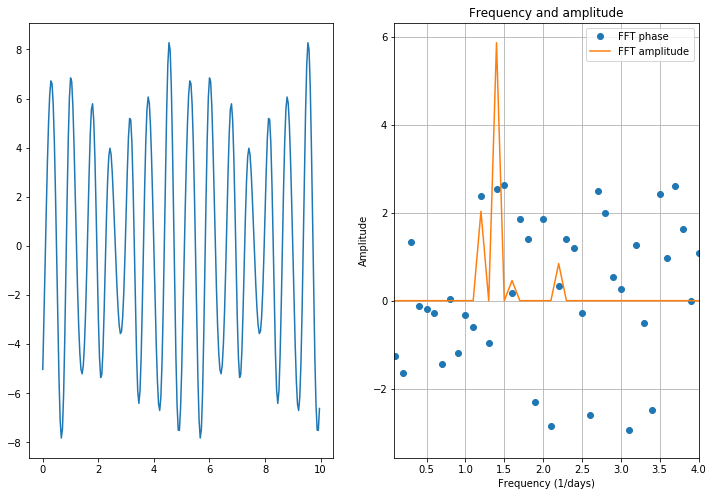

In [204]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.plot(time,y3)
fdata, freqs, amplitude, phase = proto_fft_2(y3, 1/24)
plt.subplot(122)
_ = plt.plot(freqs, phase, 'o',label="FFT phase");
_ = plt.plot(freqs, amplitude, label="FFT amplitude");
plt.title("Frequency and amplitude")
plt.xlabel("Frequency (1/days)")
plt.ylabel("Amplitude")
plt.xlim(1/12,4)#np.max(1/period)
print(np.max(1/period))
plt.legend()
#plt.xscale( 'log')
plt.grid()

In [213]:
so = np.argsort(amplitudes)[::-1]
so2 = np.argsort(amplitude)[::-1]

for i,j in zip(so,so2):
    print("GEN Amplitude {}, freq {}, phase {}".format(amplitudes[i], 1/periods[i], phases[i]))
    print("FFT Amplitude {}, freq {}, phase {}".format(amplitude[j], freqs[j], phase[j]/(2*np.pi)))
    print(" ")

GEN Amplitude 5.861207062682024, freq 1.4, phase 0.4029372435726428
FFT Amplitude 5.861207062682027, freq 1.4000000000000001, phase 0.4029372435726435
 
GEN Amplitude 2.032398544090502, freq 1.2, phase 0.37871184844713923
FFT Amplitude 2.0323985440904964, freq 1.2000000000000002, phase 0.37871184844713995
 
GEN Amplitude 0.842430866194005, freq 2.2, phase 0.05284017751859249
FFT Amplitude 0.8424308661940034, freq 2.2, phase 0.052840177518593864
 
GEN Amplitude 0.45783801633097143, freq 1.6, phase 0.02599217720858482
FFT Amplitude 0.4578380163309667, freq 1.6, phase 0.025992177208587226
 


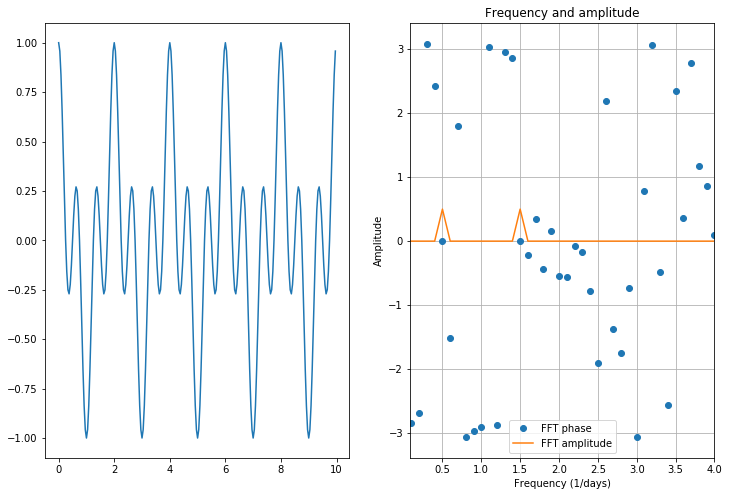

In [192]:
def waveprod(time, args):
    amp=1
    for l in args:
        amp*=cosine_wave(time, *l)
    return amp

y4 = waveprod(time, [[1,1,0],[1,2,0]])

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.plot(time,y4)
fdata, freqs, amplitude, phase = proto_fft_2(y4, 1/24)
plt.subplot(122)
_ = plt.plot(freqs, phase, 'o',label="FFT phase");
_ = plt.plot(freqs, amplitude, label="FFT amplitude");
plt.title("Frequency and amplitude")
plt.xlabel("Frequency (1/days)")
plt.ylabel("Amplitude")
plt.xlim(1/12,4)#np.max(1/period)
plt.legend()
#plt.xscale( 'log')
plt.grid()

FFTs assume the waves in your data have constant amplitude throughout the data!

If you FFT changing data, you risk aliasing real 'transient' features into 'steady' waves.

Text(0, 0.5, 'Pressure (Pa)')

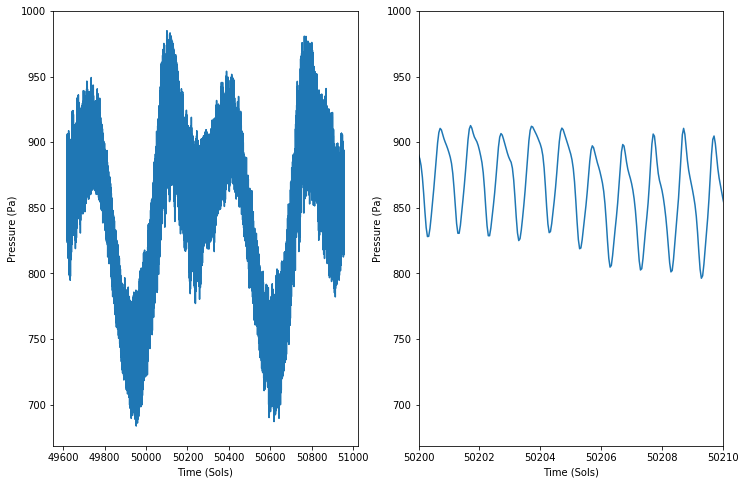

In [229]:
#real data?
d = np.loadtxt("msl_rems.csv",skiprows=1,delimiter=',').T
fig, axs =plt.subplots(1,2,figsize=(12,8))

axs[0].plot(d[0], d[6])
axs[0].set_xlabel("Time (Sols)")
axs[0].set_ylabel("Pressure (Pa)")

axs[1].plot(d[0], d[6])
axs[1].set_xlim(50200,50210)
axs[1].set_xlabel("Time (Sols)")
axs[1].set_ylabel("Pressure (Pa)")

(0, 50)

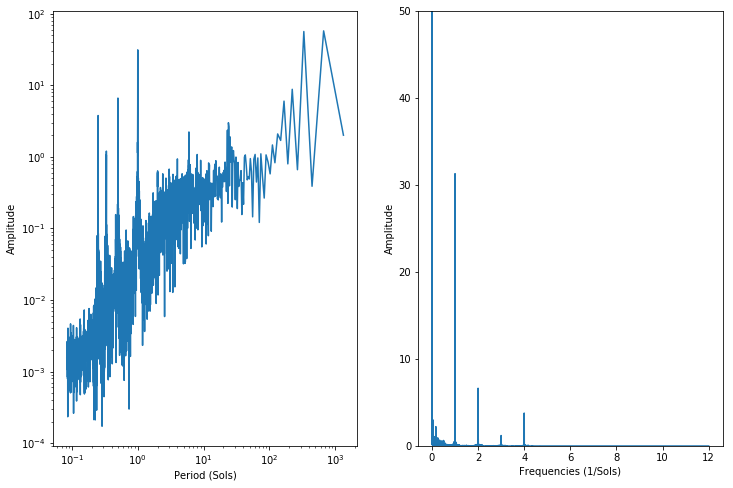

In [231]:
fdata, freqs, amplitude, phase = proto_fft_2(d[6], 1/24)
fig, axs =plt.subplots(1,2,figsize=(12,8))
axs[0].plot(1/freqs[1:], amplitude[1:])
axs[0].set_xlabel("Period (Sols)")
axs[0].set_ylabel("Amplitude")
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].plot(freqs, amplitude)
axs[1].set_xlabel("Frequencies (1/Sols)")
axs[1].set_ylabel("Amplitude");
axs[1].set_ylim(0,50)